# Exercise 8
### Jan Kesting, Felix Fleischle - 23.6.2023 - Group 1 Jeong Yun Choi

#### 1. Finding the fixed points
The two trivial fixed points are $N_i=0$, $P_i=0\, \forall i$ <br />
and $N_i = a_i$, $P_i=0\, \forall i$ <br />
The non-trivial fixed point is $N_i=1\, \forall i$, $P_i=1\, \forall i$, since the coefficients $b_{ij}$ and $c_{ij}$ are chosen such that $\sum_j b_{1j} = a_j -1 $ etc.
#### 2. Finding the jacobi matrix
To find the jacobi matrix, we have to take the derivative of all $N_i$ and $P_i$ with respect to all $N_i$ and $P_i$. <br />
We can see that $\frac{\partial N_i}{\partial N_j} = -\delta_{ij}$ and $\frac{\partial P_i}{\partial P_j} = 0$ <br />
The other derivatives are $\frac{\partial N_i}{\partial P_j} = -b_{ij}$ and $\frac{\partial P_i}{\partial N_j} = c_{ij}$. <br />
This results in the jacobi matrix seen two cells below

#### 3. Determining eigenvalues and eigenvectors and plotting the time evolution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig

In [2]:
# Entering the jacobi matrix A into python
A = np.array([[-1, 0, 0, -2, -3, -5],
              [0, -1, 0, -1, -3, -7],
              [0, 0, -1, -4, -3, -2], 
              [2, 3, 3, 0, 0, 0],
              [3, 3, 3, 0, 0, 0],
              [7, 8, 2, 0, 0, 0]
             ]
            )

In [3]:
# Computing the eigenvalues and eigenvectors
eigenvalues, eigenvectors = eig(A)

In [4]:
print("Eigenvalues:", eigenvalues)

Eigenvalues: [-0.5       +11.49987993j -0.5       -11.49987993j
 -0.5        +2.86435966j -0.5        -2.86435966j
 -0.94921549 +0.j         -0.05078451 +0.j        ]


In [5]:
print("Eigenvectors:", eigenvectors)

Eigenvectors: [[-0.01704721+3.92081627e-01j -0.01704721-3.92081627e-01j
  -0.04191103+1.28319588e-16j -0.04191103-1.28319588e-16j
   0.62423005+0.00000000e+00j  0.06584857+0.00000000e+00j]
 [-0.02071445+4.76427449e-01j -0.02071445-4.76427449e-01j
   0.33723933-1.31109374e-16j  0.33723933+1.31109374e-16j
  -0.58813752+0.00000000e+00j -0.06204125+0.00000000e+00j]
 [-0.01204587+2.77052197e-01j -0.01204587-2.77052197e-01j
  -0.67563091+0.00000000e+00j -0.67563091-0.00000000e+00j
   0.09658451+0.00000000e+00j  0.01018847+0.00000000e+00j]
 [ 0.26475078+2.25358210e-17j  0.26475078-2.25358210e-17j
   0.06499435+3.72334401e-01j  0.06499435-3.72334401e-01j
   0.23830094+0.00000000e+00j  0.46985185+0.00000000e+00j]
 [ 0.29884519+1.81841913e-17j  0.29884519-1.81841913e-17j
   0.06747296+3.86533639e-01j  0.06747296-3.86533639e-01j
  -0.41932639+0.00000000e+00j -0.8267751 +0.00000000e+00j]
 [ 0.61827562+0.00000000e+00j  0.61827562-0.00000000e+00j
  -0.06229041-3.56844292e-01j -0.06229041+3.56844292e

In [6]:
# Plotting and discussing the solutions for all 6 populations

# initial value:
v_0 = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

# First, find the coefficients such that v_0 = c_i * x_i with the eigenvectors x_i
coefficients = np.linalg.solve(eigenvectors, v_0)
print("Coefficients c:", coefficients)

# now, the time evolution is given as sum_i c_i e^(lambda_i tau) x_i
def v_tau(tau, coefficients, eigenvalues, eigenvectors):
    sum = 0
    for i in range(6):
        sum += coefficients[i] * np.exp(eigenvalues[i] * tau) * eigenvectors[i]
    return sum

Coefficients c: [ 0.10934355-1.27789980e-01j  0.10934355+1.27789980e-01j
 -0.02337358-5.62691341e-02j -0.02337358+5.62691341e-02j
  0.00187305-5.81702643e-18j  0.00594337+2.81806984e-18j]


In [7]:
# Computing v_tau manually, since simple numpy linspaces dont work here
tau = np.linspace(0, 10, 500)
v_evo = []
for tauitr in tau:
    res = abs( v_tau(tauitr, coefficients, eigenvalues, eigenvectors) )
    v_evo.append(res)
    
v_evo = np.asarray(v_evo)
print(v_evo)

[[0.10360137 0.07414705 0.08395153 0.12070919 0.14700265 0.01424538]
 [0.12652841 0.09664376 0.07692639 0.11443779 0.11129266 0.01619108]
 [0.14293285 0.11270379 0.06809308 0.10642079 0.07008046 0.01946281]
 ...
 [0.00225871 0.00245539 0.00181288 0.00072195 0.00092154 0.0010965 ]
 [0.00222588 0.00237841 0.00189023 0.00066564 0.0011067  0.00108087]
 [0.00219619 0.00230636 0.00194895 0.00063475 0.00125734 0.00106614]]


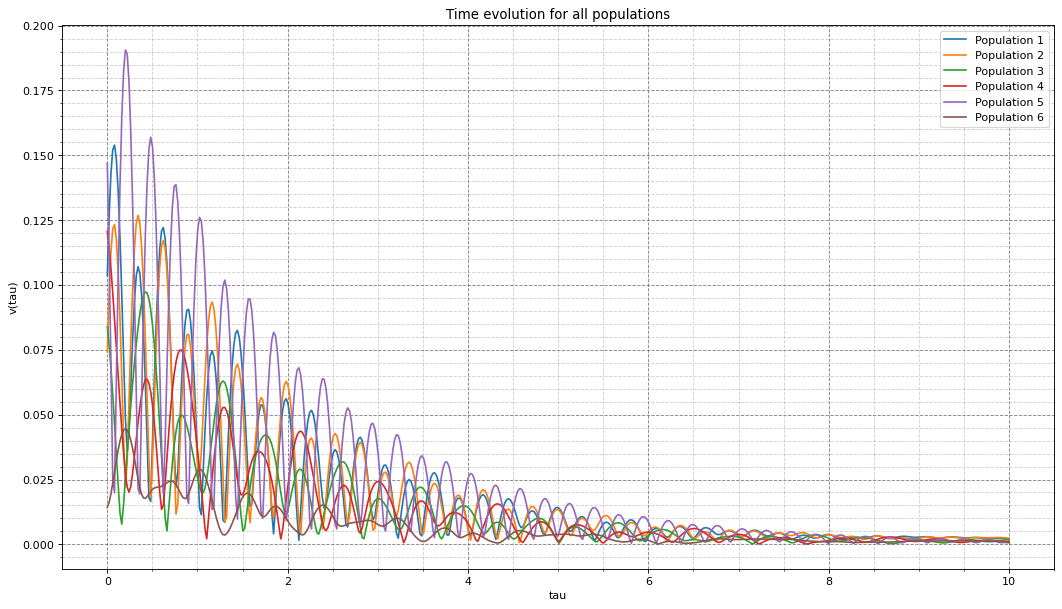

In [8]:
# Now, plotting the time evolution for all populations
plt.figure(figsize=(16, 9), dpi=80)
for i in range(6):
    plt.plot(tau, v_evo[:,i], label="Population "+ str(i+1))
plt.xlabel("tau")
plt.ylabel('v(tau)')
plt.title('Time evolution for all populations')
plt.grid(b=True, which='major', color='#666666', linestyle='--', alpha = 0.8)
plt.grid(b=True, which='minor', color='#666666', linestyle='--', alpha = 0.3)
plt.minorticks_on()
plt.legend()